# Table of Contents

* **[Mise en place du jeu de données](#chapter1)**
    * [Importation des librairies](#section_1_1)
    * [Chargement des fichiers](#section_1_2)
    * [Présentation et vérification des fichiers](#section_1_3)
    * [Nettoyage des données](#section_1_4)
* **[Analyses des indicateurs de ventes](#chapter2)**
    * [Etude du chiffre d'affaires](#section_2_1)
        * [Evolution du CA & Moyenne mobile](#section_2_1_1)
        * [CA par catégorie de produits](#section_2_1_2)
    * [Etude des produits](#section_2_2)
        * [Produits les plus & les moins vendus](#section_2_2_1)
        * [Prix des produits selon leurs catégories](#section_2_2_2)
    * [Etude du profil des clients](#section_2_3)
        * [Profil des clients selon leurs âges](#section_2_3_1)
        * [Répartition du chiffre d'affaires entre les clients](#section_2_3_2)
        * [Etude des clients les plus importants dans le chiffre d'affaire](#section_2_3_3)
* **[Analyses des comportements des clients](#chapter3)**
    * [Relation entre le genre & la catégorie des produits achetés](#section_3_1)
    * [Relation entre l'âge & la catégorie des produits achetés](#section_3_2)
    * [Relation entre l'âge & le montant des achats](#section_3_3)
    * [Relation entre l'âge & la fréquence d'achat](#section_3_4)
    * [Relation entre l'âge & la taille du panier moyen](#section_3_5)


# <font color='blue'>Mise en place du jeu de données <a class="anchor" id="chapter1"></a>

## <font color='purple'>Importation des librairies <a class="anchor" id="section_1_1"></a>

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import norm, kstest
import scipy.stats as stats
import statsmodels.api as sm

## <font color='purple'>Chargement des fichiers <a class="anchor" id="section_1_2"></a>

In [162]:
customers=pd.read_csv('customers.csv')
type(customers)

pandas.core.frame.DataFrame

In [163]:
products=pd.read_csv('products.csv')
type(products)

pandas.core.frame.DataFrame

In [164]:
transactions=pd.read_csv('transactions.csv')
type(transactions)

pandas.core.frame.DataFrame

## <font color='purple'>Présentation et vérification des fichiers <a class="anchor" id="section_1_3"></a>

### Dataframe customers

In [165]:
#Affichage les 5 premières lignes de la table
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [166]:
#Affichage les dimensions du dataset
print("Le tableau customers comporte {} observation(s) ou article(s)".format(customers.shape[0]))
print("Le tableau customers comporte {} colonne(s)".format(customers.shape[1]))

Le tableau customers comporte 8623 observation(s) ou article(s)
Le tableau customers comporte 3 colonne(s)


In [167]:
#Observation des données
print(customers.shape)
print('')
customers.info()

(8623, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [168]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [169]:
#Valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

Le dataframe customers n'a aucune valeurs manquantes

### Dataframe products

In [170]:
#Affichage les 5 premières lignes de la table
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [171]:
#Affichage les dimensions du dataset
print("Le tableau products comporte {} observation(s) ou article(s)".format(products.shape[0]))
print("Le tableau products comporte {} colonne(s)".format(products.shape[1]))

Le tableau products comporte 3287 observation(s) ou article(s)
Le tableau products comporte 3 colonne(s)


In [172]:
#Observation des données
print(products.shape)
print('')
products.info()

(3287, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


Il faudra modifier le type de la variable categ qui est une variable qualitative en type object

In [173]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


On remarque que le prix minimum est négatif. A remplacer par 0

In [174]:
#Valeurs manquantes
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

### Dataframe transactions

In [175]:
#Affichage des 5 premières lignes de la table
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [176]:
#Observation des données
print(transactions.shape)
print('')
transactions.info()

(679532, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Il faudra modifier le type de la variable date du type object en date

In [177]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [178]:
#Valeurs manquantes
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

## <font color='purple'>Nettoyage des données <a class="anchor" id="section_1_4"></a>

### Dataframe customers


In [179]:
#Création d'une colonne age
customers['age']=2023-customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


### Dataframe products

In [180]:
#Changement du type de la variable categ
products['categ'] = products['categ'].astype('object')

In [181]:
#Vérification de la modification
products.dtypes

id_prod     object
price      float64
categ       object
dtype: object

In [182]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.0
unique,3287,NaN,3.0
top,0_1421,NaN,0.0
freq,1,NaN,2309.0
mean,NaN,21.856641,NaN
std,NaN,29.847908,NaN
min,NaN,-1.000000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.060000,NaN
75%,NaN,22.990000,NaN


On observe le prix minimum est négatif alors qu'un prix ne peut etre négatif.

In [183]:
#Remplacement des prix négatifs par 0
products['price'] = products['price'].clip(lower=0)

La méthode clip remplace les valeurs en dessous de la limite inférieure (dans ce cas, 0) par la limite inférieure.

In [184]:
#Vérification du remplacement par 0.
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.0
unique,3287,NaN,3.0
top,0_1421,NaN,0.0
freq,1,NaN,2309.0
mean,NaN,21.856946,NaN
std,NaN,29.847680,NaN
min,NaN,0.000000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.060000,NaN
75%,NaN,22.990000,NaN


#### Recherche des valeurs aberrantes


In [185]:
# Calcul du premier quartile
q1= np.percentile(products['price'],25)
print("Q1=", q1, " ")

Q1= 6.99  


In [186]:
# Calcul du troisième quartile
q3= np.percentile(products['price'],75)
print("Q3=", q3, " ")

Q3= 22.99  


In [187]:
# Calcul de l'inter-quartile
iqr=q3-q1
print("IQR=",iqr," ")

IQR= 15.999999999999998  


In [188]:
# Calcul de la borne inférieure
lower_bound = q1 -(1.5 * iqr)
print("lower_bound=",lower_bound," ")

lower_bound= -17.009999999999998  


In [189]:
# Calcul de la borne supérieure
upper_bound = q3 +(1.5 * iqr)
print("upper_bound=",upper_bound," ")

upper_bound= 46.989999999999995  


In [190]:
# Recherche des outliers
outliers = products[(products['price'] > upper_bound) | (products['price'] < lower_bound)]
print("Le nombre total de valeurs aberrantes est de :", outliers['price'].count())
outliers['price']

Le nombre total de valeurs aberrantes est de : 302


10      225.17
11       51.92
38       72.11
49       47.22
64      107.99
         ...  
3267     63.99
3269     51.99
3271    147.99
3279     55.99
3282    115.99
Name: price, Length: 302, dtype: float64

Le dataframe products comporte 302 valeurs aberrantes

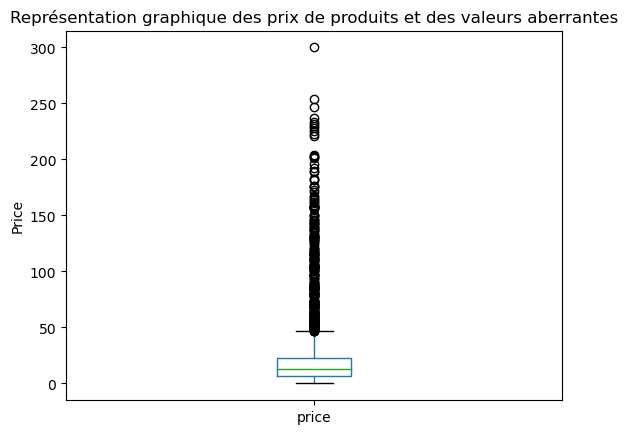

In [191]:
#Représentation graphique
products.boxplot(column =['price'],grid = False) 
plt.title('Représentation graphique des prix de produits et des valeurs aberrantes')
plt.ylabel('Price')
plt.show()

### Dataframe transactions

In [192]:
#Sélection de toutes les sessions test
transactions_test=transactions.loc[transactions['session_id']=='s_0']
transactions_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Il y'a 200 lignes qui sont des sessions test que nous converserons dans le dataframe transactions_test

In [193]:
#Création d'un dataframe sans les sessions test
transactions1=transactions.loc[transactions['session_id']!='s_0']
transactions1

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [194]:
#Changement du type de la variable date dans le dataframe sans session test
transactions1['date'] = pd.to_datetime(transactions1['date'],errors='coerce')
transactions1

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\1755554354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions1['date'] = pd.to_datetime(transactions1['date'],errors='coerce')


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [195]:
#Vérification de la modification
transactions1.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [196]:
transactions1.describe(include='all')

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\671836488.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions1.describe(include='all')


,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2023-02-28 23:58:30.792755,NaN,NaN


In [197]:
transactions1['year'] = transactions1['date'].dt.year

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\3644814340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions1['year'] = transactions1['date'].dt.year


In [198]:
transactions1['month'] = transactions1['date'].dt.month

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\1581803152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions1['month'] = transactions1['date'].dt.month


In [199]:
transactions1

,id_prod,date,session_id,client_id,year,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1
...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022,1
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022,3
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022,12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021,7


In [200]:
#Création de la colonne 'année-mois'
transactions1['year-month'] = transactions1['year'].astype(str)+ "-" + transactions1['month'].astype(str)
transactions1

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\76902965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions1['year-month'] = transactions1['year'].astype(str)+ "-" + transactions1['month'].astype(str)


,id_prod,date,session_id,client_id,year,month,year-month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,2022-5
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2022-2
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,2022-6
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,2021-6
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,2023-1
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022,1,2022-1
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022,3,2022-3
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022,12,2022-12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021,7,2021-7


In [201]:
transactions1['year-month'] = transactions1['date'].dt.strftime('%Y-%m')

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\234596885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions1['year-month'] = transactions1['date'].dt.strftime('%Y-%m')


In [202]:
transactions1


,id_prod,date,session_id,client_id,year,month,year-month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,2023-01
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022,1,2022-01
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022,3,2022-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022,12,2022-12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021,7,2021-07


# <font color='blue'>Analyses des indicateurs de ventes<a class="anchor" id="chapter2"></a>

## <font color='purple'>Etude du chiffre d'affaires<a class="anchor" id="section_2_1"></a>

In [203]:
# Jointure entre transactions1 et products
transactions_prod=pd.merge(transactions1, products, on= 'id_prod', how='left',indicator=True)
transactions_prod

,id_prod,date,session_id,client_id,year,month,year-month,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,2022-05,4.18,0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2022-02,15.99,1,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,2022-06,7.99,0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,2021-06,69.99,2,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,2023-01,4.99,0,both
...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022,1,2022-01,12.99,0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022,3,2022-03,10.99,1,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022,12,2022-12,12.99,0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021,7,2021-07,4.98,0,both


In [204]:
#Stockage des valeurs ayant trouvés une correspondance dans la jointure entre les dataframes transactions1 et products
transactions_prodb=transactions_prod.loc[transactions_prod['_merge'] == 'both']
transactions_prodb.shape

(679111, 10)

In [205]:
#Stockage des valeurs qui n'ont pas trouvé de correspondance lors de la jointure entre les dataframes transactions1 et products
transactions_prod1=transactions_prod.loc[transactions_prod['_merge'] != 'both']
transactions_prod1.shape

(221, 10)

In [206]:
# Identification du type de jointure où certaines lignes n'ont pas trouvé de correspondance
transactions_prod_left=transactions_prod.loc[transactions_prod['_merge']=='left_only']
transactions_prod_left.shape

(221, 10)

In [207]:
transactions_prod_right=transactions_prod.loc[transactions_prod['_merge']=='right_only']
transactions_prod_right.shape

(0, 10)

Nous constatons que la jointure pour laquelle il n'y a pas eu correspondance sur toutes les lignes est de type 'left_only'. Ce qui nous permet de conclure que tous les 'id_prod' du dataframe transactions1, n'ont pas trouvé de correspondance dans le 'id_prod' du dataframe products(des produits).

In [208]:
#Observation des valeurs NaN de la colonne ['price'] par la création d'un nouveau dataframe 
transac_prod_null=transactions_prod[transactions_prod['price'].isnull()]
transac_prod_null

,id_prod,date,session_id,client_id,year,month,year-month,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022,9,2022-09,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022,7,2022-07,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022,12,2022-12,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021,8,2021-08,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022,7,2022-07,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021,8,2021-08,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022,3,2022-03,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022,5,2022-05,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022,2,2022-02,NaN,NaN,left_only


In [209]:
# Observation de la colonne post_type
transac_prod_null['id_prod'].unique()

array(['0_2245'], dtype=object)

Nous constatons qu'il y a un seul produit sans prix qui a fait l'objet de 221 ventes.

Nous estimerons son prix en faisant la moyenne des prix des produits de la catégorie à laquelle il appartient.Ici il s'agit de la catégorie 0 en observant les id_prod qui commencent par 0 à savoir 0_2245 .

In [210]:
#Calcul du prix moyen de la catégorie 0.
products[products.categ==0].mean()['price']

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\2541703799.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  products[products.categ==0].mean()['price']


11.727713295799326

In [211]:
# Remplacez les valeurs NaN dans la colonne 'price' par la moyenne de la catégorie correspondante
products_final = products.append({'id_prod':'0_2245', 'price':products[products.categ==0].mean()['price'], 'categ':0}, ignore_index=True)

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\3059441692.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  products_final = products.append({'id_prod':'0_2245', 'price':products[products.categ==0].mean()['price'], 'categ':0}, ignore_index=True)
C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\3059441692.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  products_final = products.append({'id_prod':'0_2245', 'price':products[products.categ==0].mean()['price'], 'categ':0}, ignore_index=True)


In [212]:
products_final.shape

(3288, 3)

In [213]:
# Vérification de l'effectivité de la modification.
products_null=products[products_final['price'].isnull()]
products_null


C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\2654040575.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  products_null=products[products_final['price'].isnull()]


,id_prod,price,categ


In [214]:
products_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  0 non-null      object 
 1   price    0 non-null      float64
 2   categ    0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [215]:
transactions1.shape

(679332, 7)

In [216]:
products_final.shape

(3288, 3)

Toutes les valeurs de notre colonne 'price' ont bien été remplacé par le prix moyen de la catégorie 0.

In [217]:
# Nous allons effectuer à nouveau notre jointure entre transactions1 et products
transactions_prod_final=pd.merge(transactions1, products_final, on= 'id_prod', how='left',indicator=True)
transactions_prod_final

,id_prod,date,session_id,client_id,year,month,year-month,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,2022-05,4.18,0,both
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2022-02,15.99,1,both
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,2022-06,7.99,0,both
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,2021-06,69.99,2,both
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,2023-01,4.99,0,both
...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022,1,2022-01,12.99,0,both
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022,3,2022-03,10.99,1,both
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022,12,2022-12,12.99,0,both
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021,7,2021-07,4.98,0,both


In [218]:
transactions_prod_final.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
year                   int64
month                  int64
year-month            object
price                float64
categ                 object
_merge              category
dtype: object

In [219]:
#Vérification des valeurs qui n'ont pas trouvé de correspondance lors de la jointure entre les dataframes transactions1 et products
transactions_prod_final1=transactions_prod_final.loc[transactions_prod_final['_merge'] != 'both']
transactions_prod_final.shape

(679332, 10)

Nous observons que toutes les valeurs des deux dataframes utilsés pour la jointure ont trouvé correspondance.


In [220]:
#Suppression des variables 'month' et 'year'
transactions_prod_final=transactions_prod_final.drop(['month', 'year'], axis=1)

In [221]:
#Calcul du CA par mois
CA_mensuel = transactions_prod_final.groupby(transactions_prod_final['year-month'])['price'].sum().reset_index(name='CA_month')
CA_mensuel

,year-month,CA_month
0,2021-03,482546.159420
1,2021-04,476273.487986
2,2021-05,493037.291706
3,2021-06,484170.653993
4,2021-07,482882.310853
5,2021-08,482390.339420
6,2021-09,507381.412560
7,2021-10,320880.833993
8,2021-11,516285.007133
9,2021-12,525999.373993


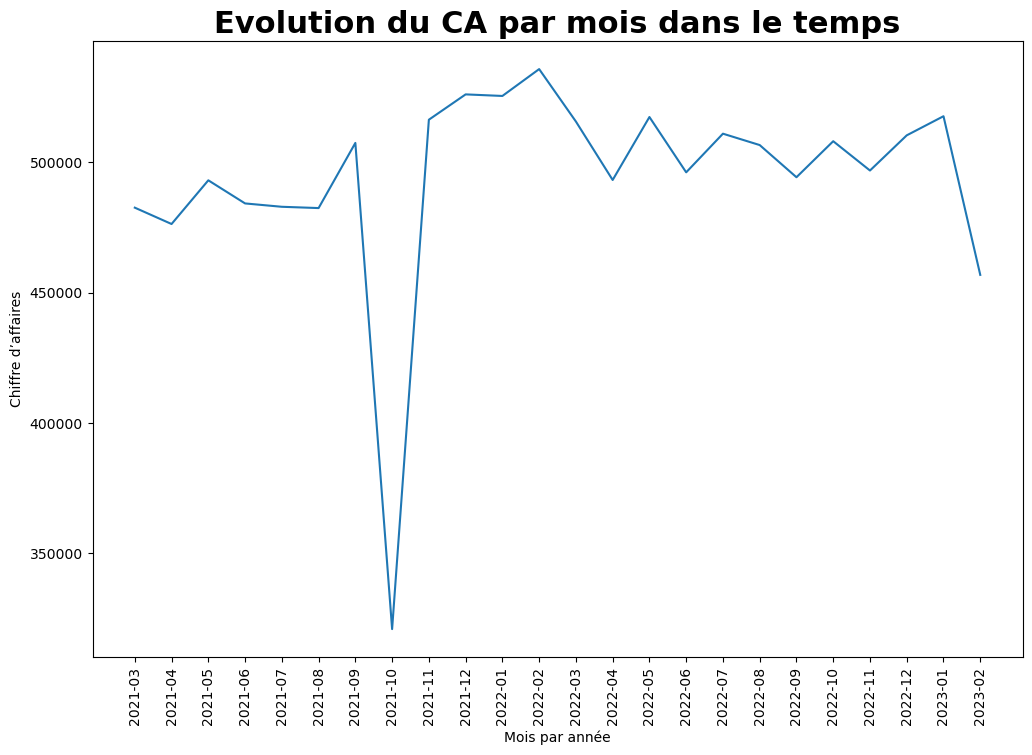

In [222]:
# Visualisation de l'évolution du chiffre d'affaires dans le temps
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
plt.plot(CA_mensuel['year-month'], CA_mensuel['CA_month'])
plt.xticks(rotation=90)
plt.title("Evolution du CA par mois dans le temps", fontsize=22, fontweight='bold')
ax = ax.set(xlabel="Mois par année", ylabel="Chiffre d’affaires")
plt.show()

### <font color='purple'>Evolution du CA & Moyenne mobile<a class="anchor" id="section_2_1_1"></a>

In [223]:
# Calcul de la moyenne mobile sur 3 mois pour évaluer la tendance globale
CA_mensuel['MA_3'] = CA_mensuel['CA_month'].rolling(window=3).mean()

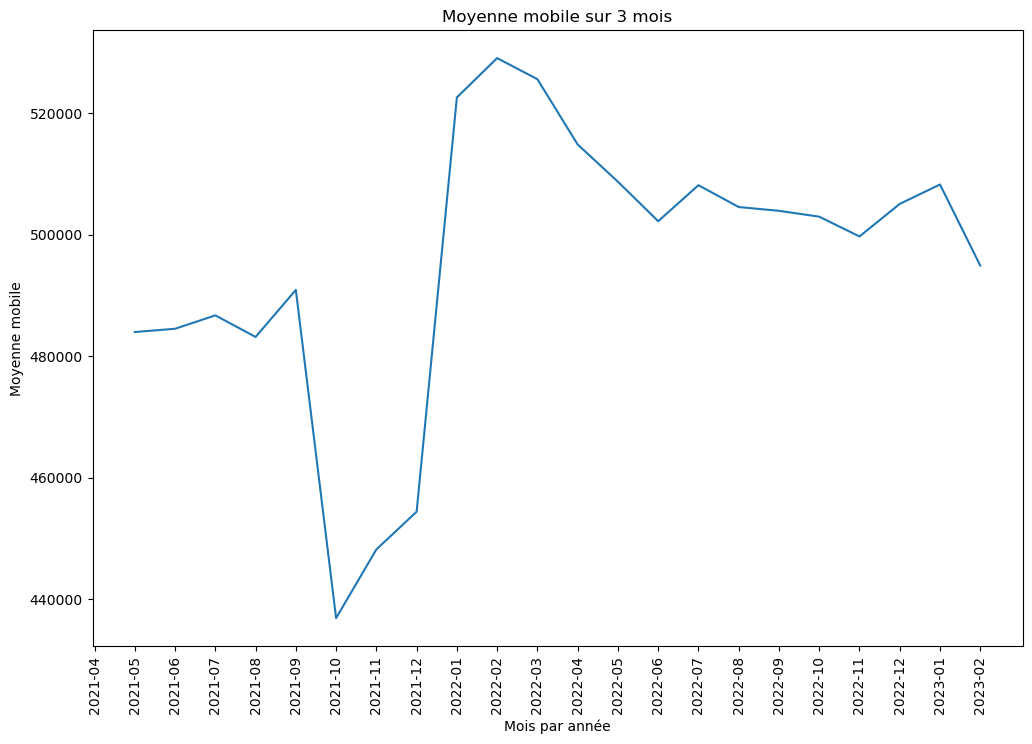

In [224]:
# Visualisation de la moyenne mobile
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.plot(CA_mensuel['year-month'], CA_mensuel['MA_3'])
plt.title('Moyenne mobile sur 3 mois')
plt.xlabel('Mois par année')
plt.ylabel('Moyenne mobile')
plt.show()

La moyenne mobile sert à lisser les fluctuations à court terme et à mettre en évidence les tendances à plus long terme.

Il est à noter que  la tendance générale du chiffre d'affaires est à la hausse lorsque la moyenne mobile augmente. Inversement,la tendance générale du chiffre d'affaires est à la baisse si la moyenne mobile diminue.

La moyenne mobile par trimestre connait aussi une baisse considérable en Octobre 2021 à l'image de la courbe du chiffre d'affaires mensuel.

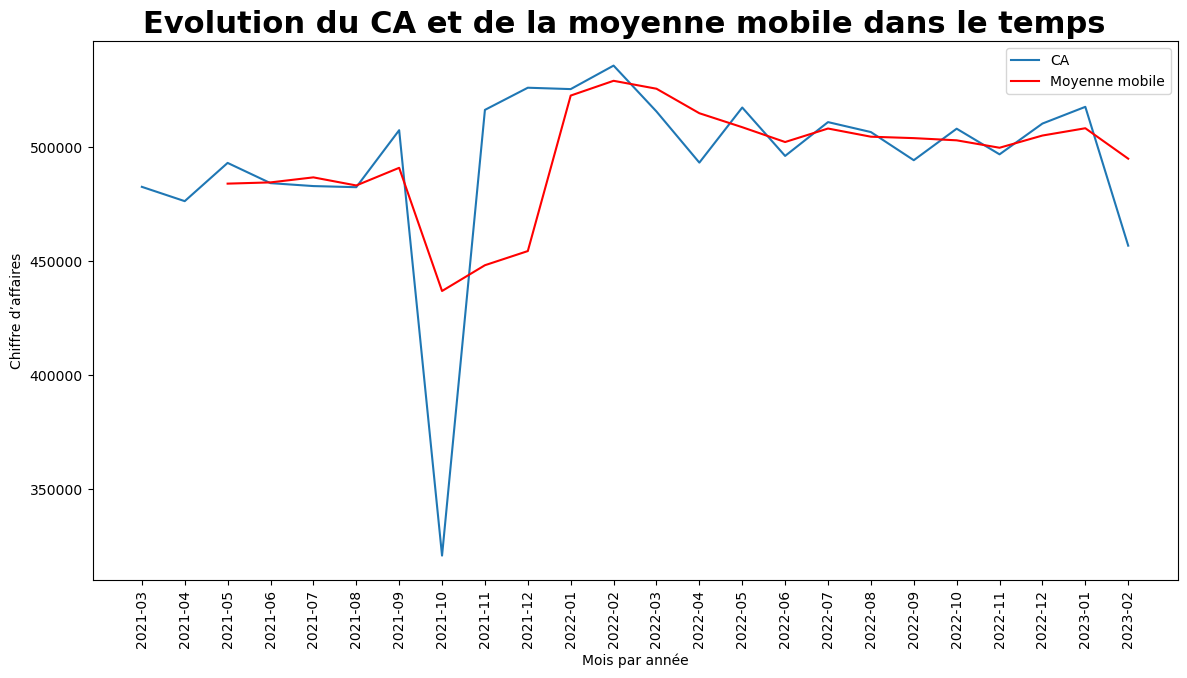

In [225]:
# Visualisation de l'évolution du chiffre d'affaires dans le temps et de la moyenne mobile
fig = plt.figure(figsize=(14,7))
ax = plt.axes()
plt.plot(CA_mensuel['year-month'], CA_mensuel['CA_month'],label='CA')
plt.xticks(rotation=90)
plt.title("Evolution du CA et de la moyenne mobile dans le temps  ", fontsize=22, fontweight='bold')
ax = ax.set(xlabel="Mois par année", ylabel="Chiffre d’affaires")
plt.plot(CA_mensuel['year-month'], CA_mensuel['MA_3'],label='Moyenne mobile', color='red')
plt.legend(loc='best')
plt.show()

La diminution considérable du chiffre d'affaires est ausi observée en Octobre 2021.

On remarque également que la courbe du chiffre d'affaires oscille autour de la moyenne mobile, suggérant une volatilité dans le chiffre d'affaires.Ce dernier présente des variations importantes et fréquentes par rapport à la moyenne. Autrement dit, on observe une instabilité marquée dans les niveaux de ventes d'une période à l'autre.

Nous observons avec la moyenne mobile que les fluctuations sont moins significatives.


* Observation du chiffre d'affaires au mois d'Octobre 2021

In [226]:
# Création de la variable day
transactions_prod_final['day']= transactions_prod_final['date'].dt.strftime('%Y-%m-%d')
transactions_prod_final.head()

,id_prod,date,session_id,client_id,year-month,price,categ,_merge,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,4.18,0,both,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02,15.99,1,both,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06,7.99,0,both,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06,69.99,2,both,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01,4.99,0,both,2023-01-11


In [227]:
# Calcul du chiffre d'affaires par jours
CA_jour=transactions_prod_final.groupby(transactions_prod_final['day'])['price'].sum().reset_index(name='CA_day')
CA_jour.head()

,day,CA_day
0,2021-03-01,16576.947713
1,2021-03-02,15498.177713
2,2021-03-03,15198.690000
3,2021-03-04,15196.070000
4,2021-03-05,17471.370000


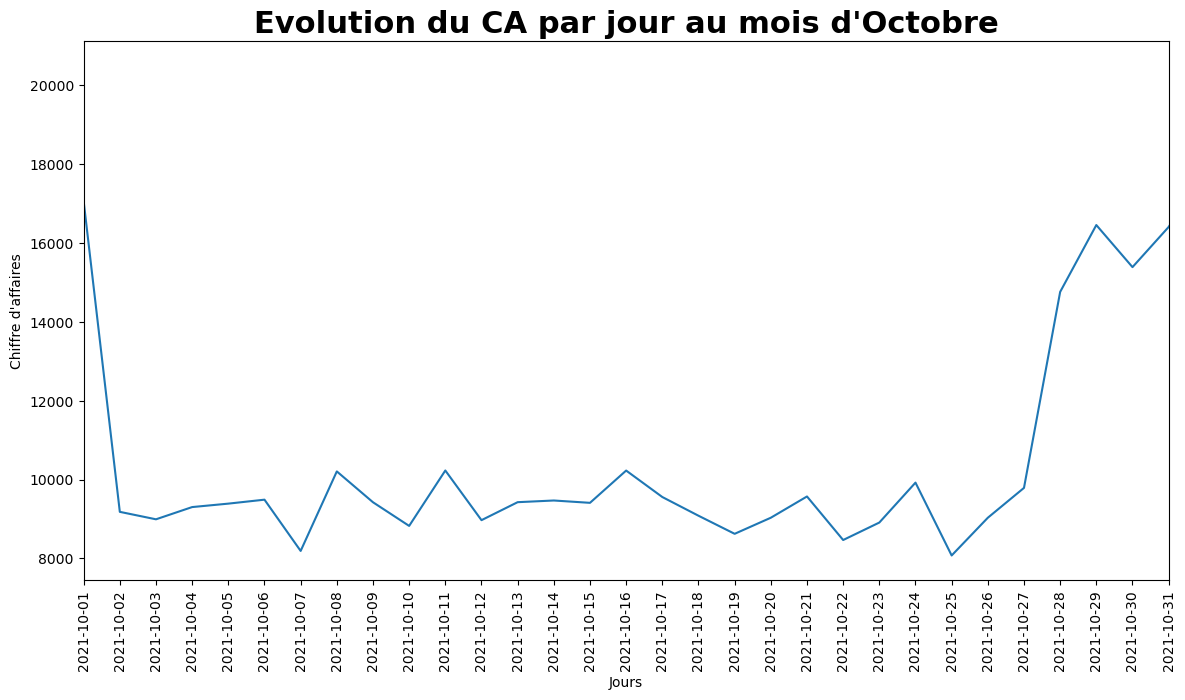

In [228]:
# Visualisation de l'évolution du CA par jours au mois d'Octobre 2021
fig = plt.figure(figsize=(14,7))
ax = plt.axes()
plt.plot(CA_jour['day'], CA_jour['CA_day'])
plt.xticks(rotation=90)
plt.xlim('2021-10-01', '2021-10-31')
plt.title("Evolution du CA par jour au mois d'Octobre", fontsize=22, fontweight='bold')
ax = ax.set(xlabel="Jours", ylabel="Chiffre d'affaires")
plt.show()

La diminution significative du chiffre d'affaires a été constatée à partir du 2 octobre 2021 et s'est poursuivie jusqu'au 27 du même mois.

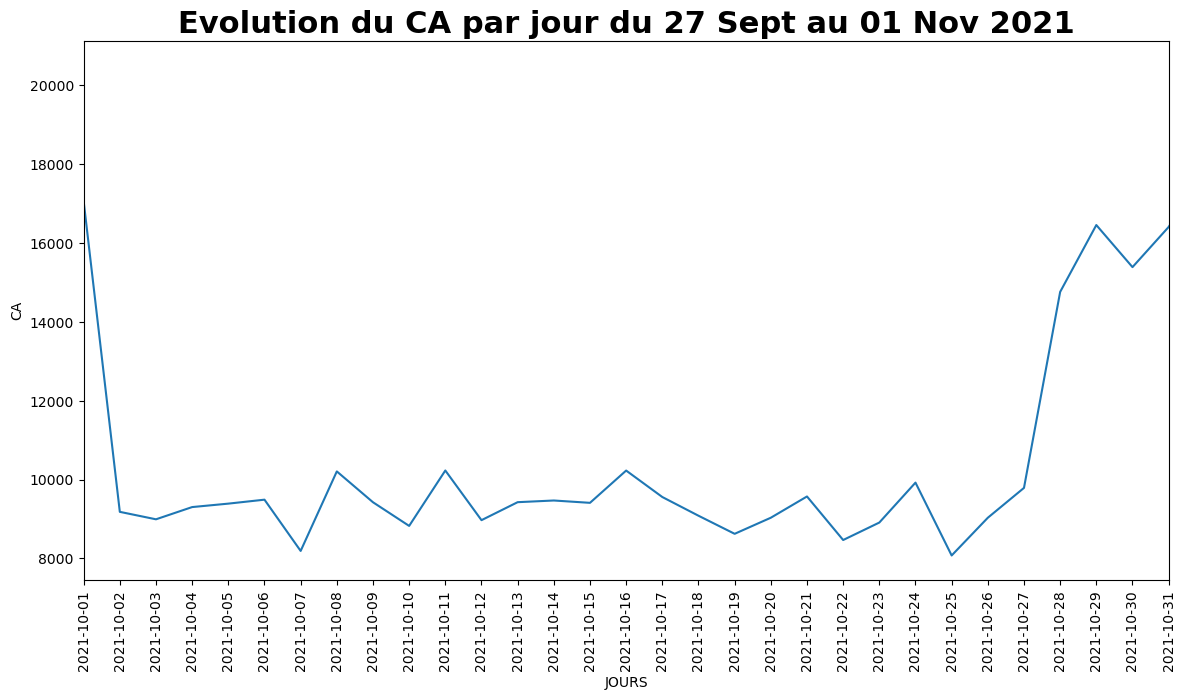

In [229]:
# Représentation graphique de l'évolution quotidienne du chiffre d'affaires au fil du temps.
fig = plt.figure(figsize=(14,7))
ax = plt.axes()
plt.plot(CA_jour['day'], CA_jour['CA_day'])
plt.xticks(rotation=90)
plt.xlim('2021-10-01', '2021-10-31')
plt.title("Evolution du CA par jour du 27 Sept au 01 Nov 2021", fontsize=22, fontweight='bold')
ax = ax.set(xlabel="JOURS", ylabel="CA")
plt.show()

### <font color='purple'>CA par catégorie de produits <a class="anchor" id="section_2_1_2"></a>

In [230]:
# Calcul du chiffre d'affaires par catégorie par mois au fil des années
CA_categ=transactions_prod_final.groupby(['year-month', 'categ']).sum()[['price']]
CA_categ

price
year-month categ               
2021-03    0      193734.719420
           1      186974.170000
           2      101837.270000
2021-04    0      205386.647986
           1      156138.350000
...                         ...
2023-01    1      210104.410000
           2      126153.080000
2023-02    0      162539.093993
           1      180347.240000
           2      113875.520000

[72 rows x 1 columns]

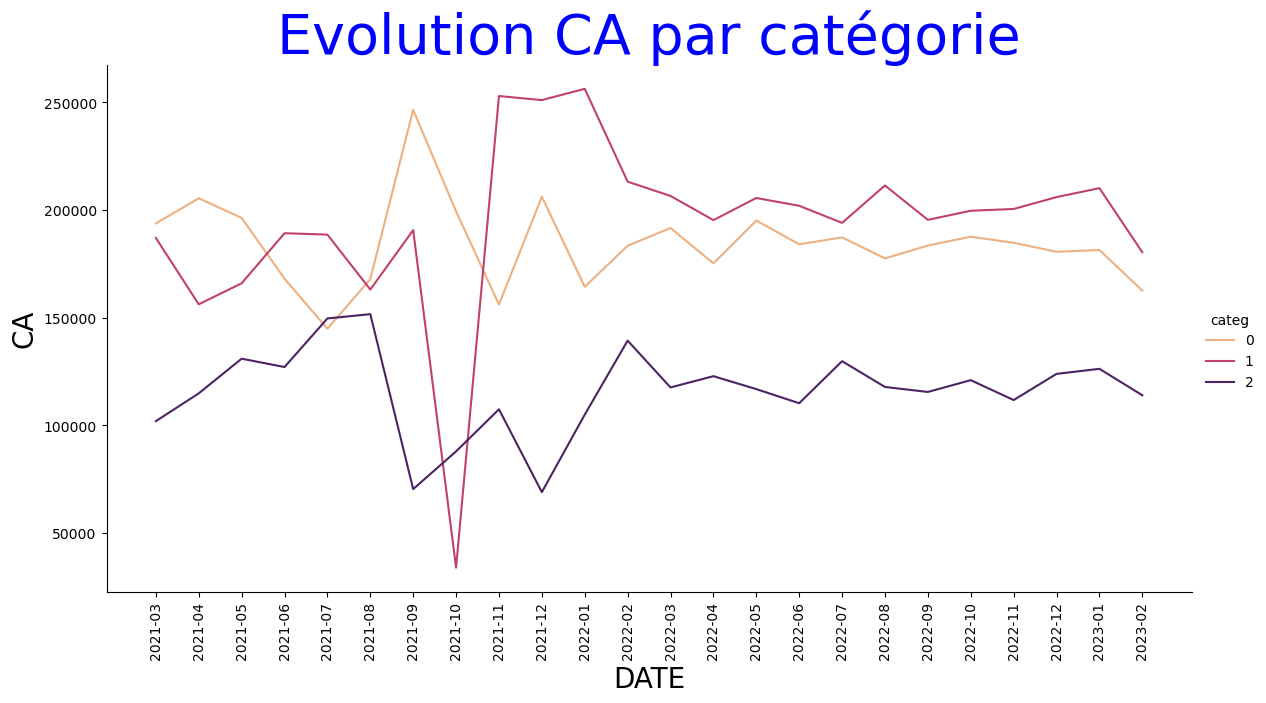

In [231]:
#Visualisation de l'évolution du chiffre d'affaires par categorie par mois au fil des années
sns.relplot(
    data=CA_categ,
    x='year-month', y='price',
    hue='categ',
    kind='line',
    palette = 'flare',
    height=6, aspect=2)
plt.title('Evolution CA par catégorie', fontsize=40, color='blue')
plt.xlabel('DATE', size = 20)
plt.ylabel('CA', size = 20)
plt.xticks(size = 10, rotation=90)
plt.yticks(size = 10)
plt.show()

On constate un baisse significative du Chiffre d'affaires des produits de la catégorie 1 en Octobre 2021 justifiant ainsi la chute du CA globale observé pour ce même mois.

Nous allons toutefois observer le CA par jour par catégorie.



In [232]:
# Création d'un dataframe du cghiffre d'affaires par catégorie et par jour
CA_jours = transactions_prod_final.groupby(['day', 'categ'])['price'].sum().reset_index().rename(columns={'price':'CA_cat_day'})
CA_jours

,day,categ,CA_cat_day
0,2021-03-01,0,6274.377713
1,2021-03-01,1,6811.530000
2,2021-03-01,2,3491.040000
3,2021-03-02,0,6729.997713
4,2021-03-02,1,5627.150000
...,...,...,...
2159,2023-02-27,1,6461.760000
2160,2023-02-27,2,5271.620000
2161,2023-02-28,0,4901.860000
2162,2023-02-28,1,9226.250000


In [233]:
# Création d'un dataframe pour le mois d'Octobre 2021
df_octobre = CA_jours.loc[(CA_jours['day'] >= '2021-10-01') & (CA_jours['day'] <= '2021-10-31')]
df_octobre

,day,categ,CA_cat_day
642,2021-10-01,0,6950.50
643,2021-10-01,1,7003.79
644,2021-10-01,2,3104.05
645,2021-10-02,0,7141.01
646,2021-10-02,2,2041.12
...,...,...,...
704,2021-10-30,1,6753.69
705,2021-10-30,2,2898.47
706,2021-10-31,0,5924.07
707,2021-10-31,1,7261.67


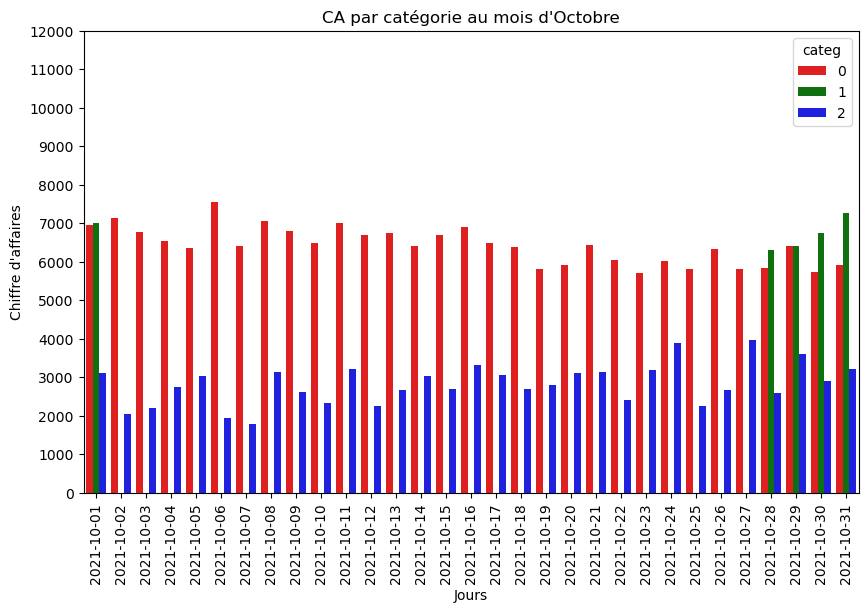

In [234]:
# Visualisation du chiffre d'affaires par catégorie au mois d'Octobre 2021
plt.figure(figsize=(10, 6))

# Création d'un dictionnaire pour associer chaque catégorie à une couleur
palette_colors = {0: "red", 1: "green", 2: "blue"}

sns.barplot(x="day", y="CA_cat_day", hue="categ", data=df_octobre, palette=palette_colors)
plt.yticks([0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000])
plt.title('CA par catégorie au mois d\'Octobre')
plt.ylabel('Chiffre d\'affaires')
plt.xlabel('Jours')
plt.xticks(rotation=90)
plt.show()

Nous constatons l'absence du CA de la catégorie 1 à partir du 02-10-2021 au 27-10-2021,ce jusqu'au 27-10-2021.


* Observation du CA de Septembre à Novembre 2021

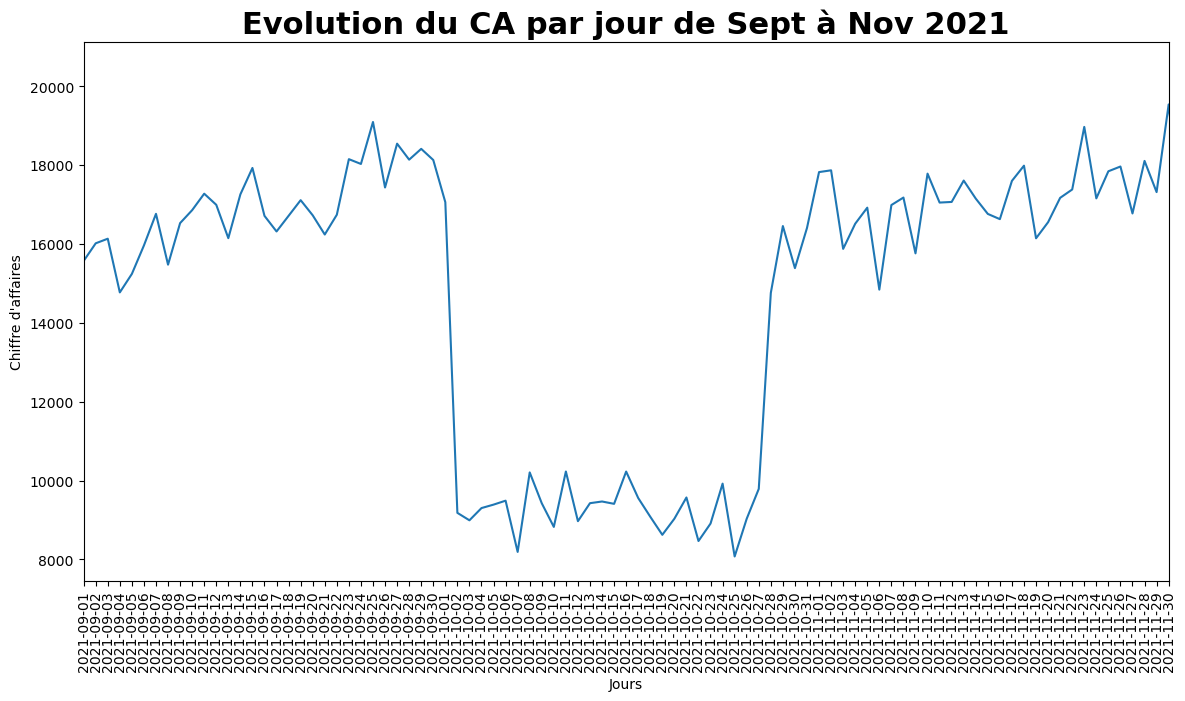

In [235]:
# Représentation graphique de l'évolution quotidienne du chiffre d'affaires de Septembre à Novembre 2021.
fig = plt.figure(figsize=(14,7))
ax = plt.axes()
plt.plot(CA_jour['day'], CA_jour['CA_day'])
plt.xticks(rotation=90)
plt.xlim('2021-09-01', '2021-11-30')
plt.title("Evolution du CA par jour de Sept à Nov 2021", fontsize=22, fontweight='bold')
ax = ax.set(xlabel="Jours", ylabel="Chiffre d'affaires")
plt.show()

Il est observé que le chiffre d'affaires atteint des niveaux relativement élevés en septembre et en novembre, mais c'est en octobre qu'une baisse significative est constatée.

In [236]:
transactions_prod_final

,id_prod,date,session_id,client_id,year-month,price,categ,_merge,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,4.18,0,both,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02,15.99,1,both,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06,7.99,0,both,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06,69.99,2,both,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01,4.99,0,both,2023-01-11
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01,12.99,0,both,2022-01-15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03,10.99,1,both,2022-03-19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12,12.99,0,both,2022-12-20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07,4.98,0,both,2021-07-16


In [237]:
#Suppression du mois d'Octobre de notre jeu de données
transactions_prod_final1 = transactions_prod_final.drop(transactions_prod_final[(transactions_prod_final['year-month'] =='2021-10') ].index)
transactions_prod_final1

,id_prod,date,session_id,client_id,year-month,price,categ,_merge,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,4.18,0,both,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02,15.99,1,both,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06,7.99,0,both,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06,69.99,2,both,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01,4.99,0,both,2023-01-11
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01,12.99,0,both,2022-01-15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03,10.99,1,both,2022-03-19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12,12.99,0,both,2022-12-20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07,4.98,0,both,2021-07-16


## <font color='purple'>Etude des produits <a class="anchor" id="section_2_2"></a>

### <font color='purple'>Produits les plus & les moins vendus <a class="anchor" id="section_2_2_1"></a>

In [238]:
# Regroupement par 'id_prod' et comptage le nombre d'occurrences de chaque produit
product_counts =transactions_prod_final1['id_prod'].value_counts()
print(product_counts)

1_369     2237
1_417     2173
1_414     2166
1_498     2117
1_425     2084
          ... 
0_898        1
0_1539       1
2_81         1
0_1533       1
0_833        1
Name: id_prod, Length: 3264, dtype: int64


* Produits les plus vendus(Tops)

In [239]:
# Tri des produits par nombre de ventes dans l'ordre décroissant et affichage des 10 produits les plus vendus
top_products = product_counts.sort_values(ascending=False).head(10)
print("Liste des 10 produits les plus vendus: \n{}".format(top_products))

Liste des 10 produits les plus vendus: 
1_369    2237
1_417    2173
1_414    2166
1_498    2117
1_425    2084
1_403    1950
1_412    1938
1_406    1931
1_413    1931
1_407    1923
Name: id_prod, dtype: int64


* Produits les moins vendus(Flops)

In [240]:
# Tri des produits par nombre de ventes dans l'ordre croissant et affichage des 10 produits les moins vendus
flop_products= product_counts.sort_values(ascending=True).head(10)
print("Liste des 10 produits les moins vendus: \n{}".format(flop_products))

Liste des 10 produits les moins vendus: 
0_833     1
0_980     1
0_1683    1
0_549     1
0_541     1
0_807     1
0_1633    1
0_1498    1
0_886     1
0_1601    1
Name: id_prod, dtype: int64


### <font color='purple'>Prix des produits selon leurs catégories <a class="anchor" id="section_2_2_2"></a>

In [241]:
# Répartition des prix par catégorie
price_distribution = products.groupby('categ')['price'].describe()
print(price_distribution)

        count        mean        std    min     25%     50%     75%     max
categ                                                                      
0      2309.0   11.727713   7.568056   0.00   5.580   10.32   16.65   40.99
1       739.0   25.531421  15.425162   2.00  13.390   22.99   33.99   80.99
2       239.0  108.354686  49.561431  30.99  71.065  101.99  136.53  300.00


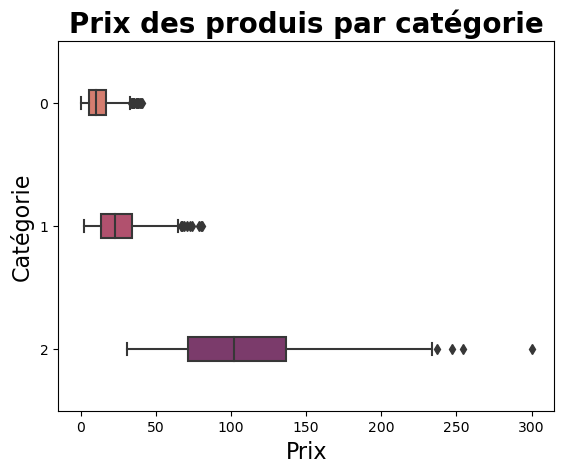

In [291]:
# Représentation graphique des prix des produits par catégorie
sns.boxplot(data=products, x='price', y='categ', orient='h', palette='flare', width=.2)
plt.title('Prix des produis par catégorie', fontsize=20, fontweight='bold')
plt.xlabel('Prix', size = 16)
plt.ylabel('Catégorie', size = 16)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

Les produits de la catégorie 0 sont identifiés par leurs coûts relativement modestes, fluctuant entre moins d'un euro et jusqu'à 40.99 euros. Pour ce qui est de la catégorie 1, elle se positionne dans une gamme de prix moyenne, faisant le pont entre les catégories 0 et 2, avec des tarifs allant de 2 euros à 80.99 euros. En revanche, la catégorie 2 englobe des produits à des prix plus hauts, s'étendant de 30.99 euros à 300 euros.

## <font color='purple'>Etude du profil des clients <a class="anchor" id="section_2_3"></a>

### <font color='purple'>Profil des clients selon leurs âges <a class="anchor" id="section_2_3_1"></a>

In [243]:
# Analyse de la répartition des clients par âge
client_par_age = customers.groupby(['age'])['client_id'].count().reset_index(name='nombre')
client_par_age

,age,nombre
0,19,440
1,20,146
2,21,146
3,22,129
4,23,136
...,...,...
71,90,8
72,91,6
73,92,4
74,93,4


La clientèle varie en âge, allant du plus jeune, âgé de 19 ans, au plus âgé, âgé de 94 ans.

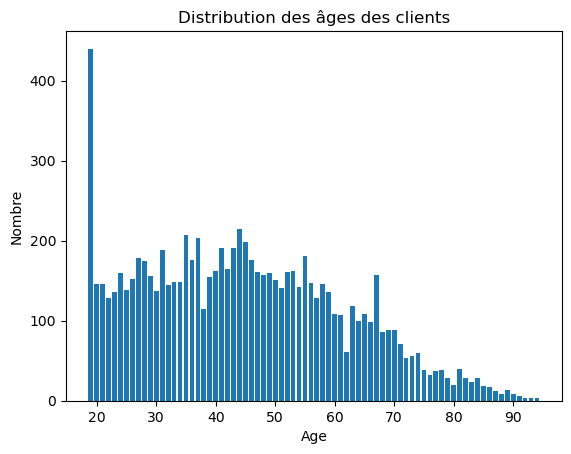

In [244]:
# Graphique de la répartition par âge
plt.bar(client_par_age['age'], client_par_age['nombre'])
plt.xlabel('Age')
plt.ylabel('Nombre')
plt.title('Distribution des âges des clients')
plt.show()

La grande majorité des clients sont des jeunes, avec plus de 1500 clients âgés de moins de 30 ans. Le groupe d'âge le plus représenté est celui des 19 ans, qui compte un nombre de clients trois fois plus élevé que les autres groupes d'âge.

Le nombre anormalement élevé de clients âgés de 19 ans peut être attribué au fait que beaucoup de clients de moins de 18 ans mentent sur leur âge afin d'accéder au site de la boutique en ligne qui leur est propablement interdit.

In [245]:
# Analyse de l'âge moyen par sexe
age_moyen_par_sexe = customers.groupby(['sex'])['age'].mean().reset_index(name='age_moyen')
age_moyen_par_sexe

,sex,age_moyen
0,f,45.005121
1,m,44.408277


En moyenne, les femmes en tant que clientes ont 45 ans, alors que les hommes ont une moyenne d'âge de 44 ans.

In [246]:
# Nombre de clients par genre
client_par_genre = customers.groupby(['sex'])['client_id'].count().reset_index(name='nombre')
client_par_genre

,sex,nombre
0,f,4491
1,m,4132


Il y a plus de clients de genre féminin avec un total de 4491, tandis que le nombre de clients de genre masculin s'élève à 4132.

### <font color='purple'>Répartition du chiffre d'affaires entre les clients <a class="anchor" id="section_2_3_2"></a>

In [247]:
transactions_prod_final1

,id_prod,date,session_id,client_id,year-month,price,categ,_merge,day
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,4.18,0,both,2022-05-20
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02,15.99,1,both,2022-02-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06,7.99,0,both,2022-06-18
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06,69.99,2,both,2021-06-24
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01,4.99,0,both,2023-01-11
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01,12.99,0,both,2022-01-15
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03,10.99,1,both,2022-03-19
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12,12.99,0,both,2022-12-20
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07,4.98,0,both,2021-07-16


In [248]:
#création d'un dataframe du chiffre d'affaires par client
repartition_CA = transactions_prod_final1.groupby(['client_id'])['price'].sum().reset_index().rename(columns={'price': 'CA'})
repartition_CA 

,client_id,CA
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08
...,...,...
8593,c_995,189.41
8594,c_996,1611.59
8595,c_997,1432.02
8596,c_998,2779.88


In [249]:
print('Il y a',repartition_CA.shape[0],'clients qui ont effectués des transactions sur la période étudiée')
print('sur les ', customers.shape[0], 'clients présents dans notre fichier customers')

Il y a 8598 clients qui ont effectués des transactions sur la période étudiée
sur les  8623 clients présents dans notre fichier customers


* Courbe de Lorenz pour la répartition du chiffre d'affaires entre les clients

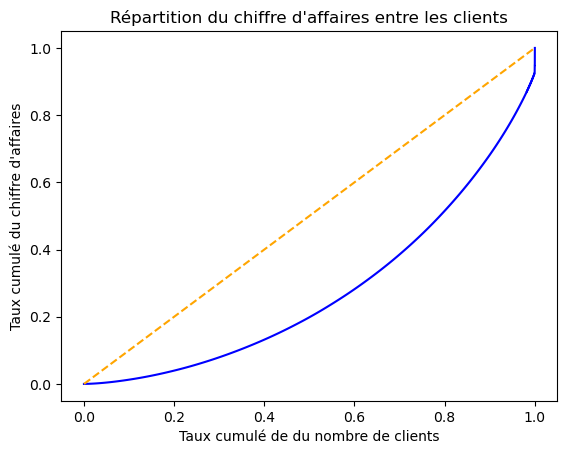

In [250]:
#Elaboration de la courbe de Lorenz
CA=repartition_CA['CA'].values
n=len(CA)
lorenz = np.cumsum(np.sort(CA)) / CA.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post',color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange')  # Tracer de la ligne d'égalité ou première bissectrice
plt.title("Répartition du chiffre d'affaires entre les clients")
plt.xlabel('Taux cumulé de du nombre de clients')
plt.ylabel('Taux cumulé du chiffre d\'affaires')

plt.show()

La courbe de Lorenz est située en dessous de la ligne d'égalité parfaite, cela indique une concentration plus élevée du chiffre d'affaires parmi un petit nombre de clients.

La courbe de Lorenz n'est pas très éloigné de la première bissectrice, indiquant ainsi une inégalité de la répartition du chiffre d'affaires pas très prononcée.

In [251]:
#Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('\nIndice de Gini =', gini)


Indice de Gini = 0.44740738360156795


D'après l'indice de Gini qui est de 0.4474, on peut dire qu'il existe une certaine inégalité dans la répartition du chiffre d'affaires entre les clients, mais elle n'est pas considérée comme extrêmement élevée.**La répartition est donc considérée comme peu égalitaire.**\
On peut aussi dire que seulement 20% des clients constituent 50% du chiffre d'affaires\
50% des clients constituent 20% du chiffre d'affaires


In [252]:
#Répartition du CA par genre
#Jointure entre transactions_prod_final et customers
transac_prod_cust=pd.merge(transactions_prod_final1,customers,on='client_id' ,how='left')
transac_prod_cust
df_genre_CA = transac_prod_cust.groupby(['sex'])['price'].agg(['sum','mean','std'])
df_genre_CA = df_genre_CA.reset_index()
df_genre_CA

,sex,sum,mean,std
0,f,5.705708e+06,17.400385,17.878739
1,m,5.829732e+06,17.675548,18.782119


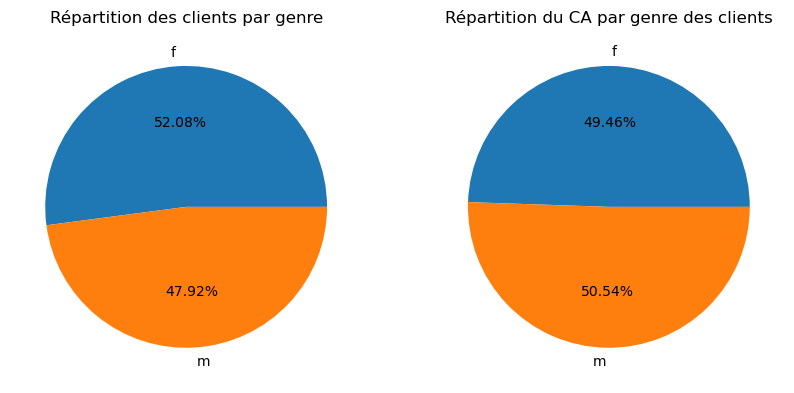

In [253]:
#Visualisation de la répartition des clients et du CA selon genre
plt.figure(1,figsize=(10,12)) #création de la fenêtre graphique
#Graphe 1 - répartition du nb
plt.subplot(1,2,1) # division de la fenêtre avec plt.subplot(nombre de lignes, nombre de colonnes, index), 1 ligne, 2 colonnes, position 1
plt.pie(x= client_par_genre['nombre'], labels =client_par_genre['sex'], autopct='%.2f%%')
plt.title('Répartition des clients par genre')
#Graphe 2 - Répartition du CA
plt.subplot(1,2,2)#1 ligne, 2 colonnes, 2eme position
plt.pie(x= df_genre_CA['sum'], labels = df_genre_CA['sex'], autopct='%.2f%%')
plt.title('Répartition du CA par genre des clients')

plt.show()

Nous constatons que malgré le fait que le nombre d'hommes soit légèrement inférieur à celui des femmes, les hommes parviennent à réaliser un chiffre d'affaires supérieur à celui des femmes.

In [254]:
# Regardons le CA moyen et l'écart-type par genre:

df_genre_CA.head()

,sex,sum,mean,std
0,f,5.705708e+06,17.400385,17.878739
1,m,5.829732e+06,17.675548,18.782119


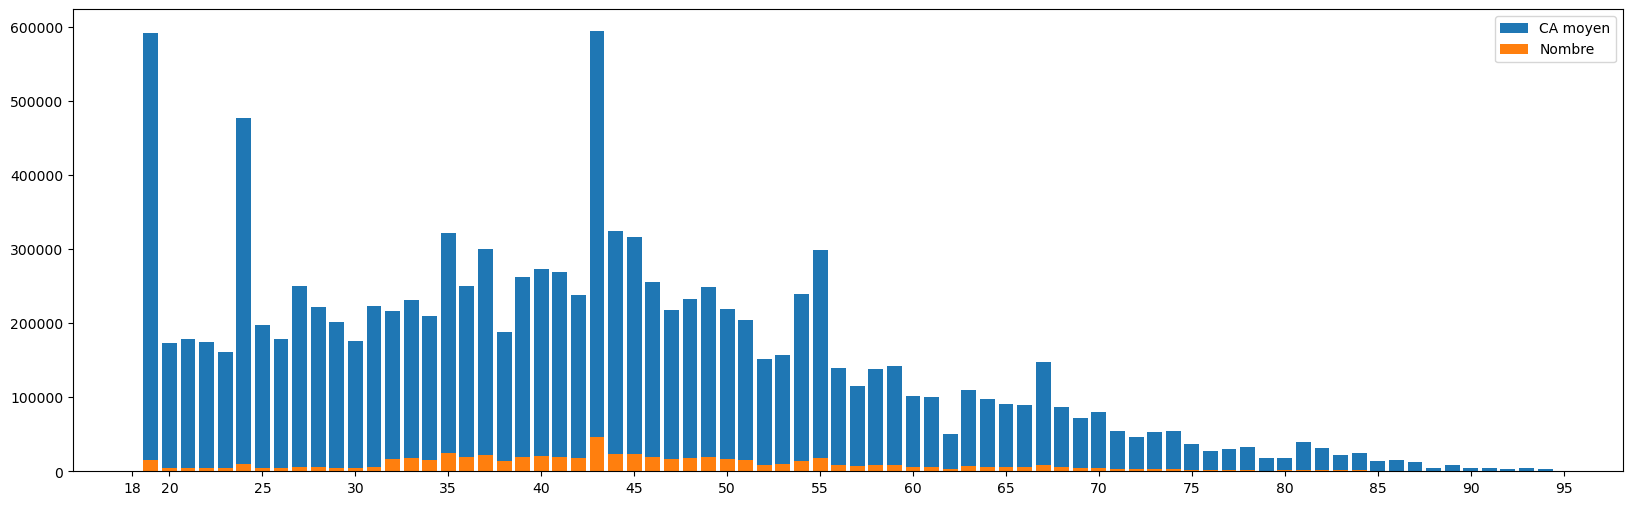

In [255]:
# Visualisation de la répartition du CA par age
df_age = transac_prod_cust.groupby(['age']).agg({'price': 'sum', 'client_id': 'count'})
df_age.reset_index(inplace=True)
df_age.rename(columns={'client_id': 'nombre', 'price': 'CA'}, inplace=True)

#Graphe de la répartition du CA moyen selon le nombre de clients par age
plt.figure(figsize=(20, 6))
plt.bar(df_age['age'], df_age['CA'], label='CA moyen')
plt.bar(df_age['age'], df_age['nombre'], label='Nombre')
plt.xticks([18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95])
plt.legend()
plt.show()

In [256]:
#Répartition du CA par age
df_age_CA = transac_prod_cust.groupby(['age'])['price'].agg(['sum','mean','std'])
df_age_CA = df_age_CA.reset_index()
df_age_CA

,age,sum,mean,std
0,19,591414.230000,40.044298,38.479860
1,20,172831.750000,40.781442,38.189306
2,21,178802.373140,40.018436,37.779863
3,22,174347.660000,41.900423,41.494132
4,23,160578.665427,37.352562,34.270507
...,...,...,...,...
71,90,5090.707713,16.160977,7.828376
72,91,4803.640000,16.394676,8.576239
73,92,2691.190000,16.409695,7.423508
74,93,3959.240000,17.834414,9.391283


### <font color='purple'>Etude des clients les plus importants dans le chiffre d'affaires <a class="anchor" id="section_2_3_3"></a>

In [257]:
# Tri du chiffre d'affaires par clients dans l'ordre décroissant et affichage des 10 plus importants clients
top_clients = repartition_CA.sort_values(by='CA', ascending=False).head(10)
print("Liste des 10 clients les plus importants par rapport au CA:\n{}".format(top_clients))

Liste des 10 clients les plus importants par rapport au CA:
     client_id             CA
677     c_1609  312755.080000
4387    c_4958  282654.610000
6336    c_6714  149854.116280
2723    c_3454  111801.893140
2108    c_2899    5214.050000
634     c_1570    5136.140000
2513    c_3263    5129.890000
7005    c_7319    5120.550000
7790    c_8026    4981.137713
4725    c_5263    4964.870000


Nous observons que nous avons 4 clients importants avec de gros CA.

In [258]:
#Création d'un dataframe avec uniquement nos quatres gros clients
clients_pro=['c_1609', 'c_4958','c_6714','c_3454']
transac_pro = repartition_CA .loc[repartition_CA['client_id'].isin(clients_pro)]
transac_pro

,client_id,CA
677,c_1609,312755.08000
2723,c_3454,111801.89314
4387,c_4958,282654.61000
6336,c_6714,149854.11628


In [259]:
#Calcul du CA réalisé par les 4 gros clients 
print("Le chiffre d'affaires réalisé par les 4 gros clients est de {:.2f} €, soit {:.2f}% du CA total.".format(transac_pro['CA'].sum(), (transac_pro['CA'].sum() * 100 / repartition_CA['CA'].sum())))

Le chiffre d'affaires réalisé par les 4 gros clients est de 857065.70 €, soit 7.43% du CA total.


* Répartition du chiffre d'affaires entre les clients gros clients

In [260]:
#Tri de la répartition du chiffre d'affaires entre les clients 
CA_pro= transac_pro.sort_values(by='CA')
CA_pro

,client_id,CA
2723,c_3454,111801.89314
6336,c_6714,149854.11628
4387,c_4958,282654.61000
677,c_1609,312755.08000


* Répartition du chiffre d'affaires entre la clientèle des particuliers

In [261]:
#Création d'un dataframe sans clients professsionnels
clients_pro=['c_1609', 'c_4958','c_6714','c_3454']
transac_prod_cust_part=transac_prod_cust[~transac_prod_cust['client_id'].isin(clients_pro)]
transac_prod_cust_part

,id_prod,date,session_id,client_id,year-month,price,categ,_merge,day,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05,4.18,0,both,2022-05-20,f,1986,37
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02,15.99,1,both,2022-02-02,m,1988,35
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06,69.99,2,both,2021-06-24,m,2000,23
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01,4.99,0,both,2023-01-11,m,1980,43
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,2022-10,8.57,0,both,2022-10-20,f,1972,51
...,...,...,...,...,...,...,...,...,...,...,...,...
657721,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01,12.99,0,both,2022-01-15,f,1951,72
657722,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03,10.99,1,both,2022-03-19,f,1977,46
657723,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12,12.99,0,both,2022-12-20,f,1988,35
657724,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07,4.98,0,both,2021-07-16,m,1986,37


In [262]:
#Répartition du chiffre d'affaires par clients des particuliers
CA_part = transac_prod_cust_part.groupby(['client_id'])['price'].sum().reset_index().rename(columns={'price': 'CA'})
CA_part 

,client_id,CA
0,c_1,550.19
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2209.92
4,c_1001,1720.08
...,...,...
8589,c_995,189.41
8590,c_996,1611.59
8591,c_997,1432.02
8592,c_998,2779.88


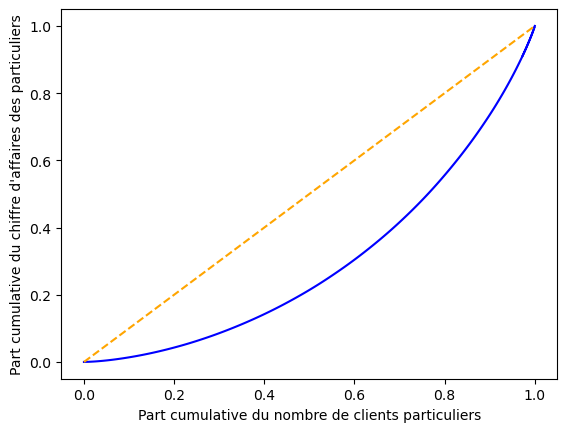

In [263]:
#Elaboration de la courbe de Lorenz pour les particuliers
part=CA_part['CA'].values
n=len(part)
lorenz= np.cumsum(np.sort(part)) / part.sum()
lorenz= np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post',color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='orange')  # Ligne d'égalité ou première bissectrice
plt.xlabel('Part cumulative du nombre de clients particuliers')
plt.ylabel('Part cumulative du chiffre d\'affaires des particuliers')

plt.show()

In [264]:
#Calcul de l'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4037376763090823

Nous constatons que le chiffre d'affaires est aussi réparti de facon inégalitaire entre la clientèle des particuliers.Toutefois cette inégalité n'est pas très prononcé

# <font color='blue'>Analyses des comportements des clients<a class="anchor" id="chapter3"></a>

Pour l'ensemble des calculs qui vont être effectué dans cette partie, nous allons chercher à démontrer que les valeurs observées sont significatives : pour cela nous comparerons notre p-valeur avec un seuil alpha de 5%. 

Nos hypothèses seront:

**H0:Absence de corrélation entre les deux variables.**

**H1:Présence d'une corrélation entre les deux variables.**

Si le résultat de la p-valeur obtenue pour chaque analyse est inférieur à notre seuil alpha(5%), nous rejeterons notre hypothèse nulle (H0 = absence de corrélation) et nous considérerons notre hypothèse(H1=présence d'une relation,qui sera représentée par le coefficient de corrélation (r) pour les régressions linéaires).

## <font color='purple'>Relation entre le genre & la catégorie des produits achetés <a class="anchor" id="section_3_1"></a>

Les deux variables sont qualitatives et proviennent de deux échantillons indépendants.\
Nous réaliserons un heatmap sur un tableau de contingence et un test statistique d'association sur deux variables qualitatives provenant de deux échantillons indépendants.\
H0:La variable genre et la variable catégorie des produits achetés sont indépendantes\
H1:Les deux variables sont dépendantes 

In [265]:
# Création du tableau de contingence
X ='sex'
Y='categ'
tableau_cont=transac_prod_cust_part[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
tableau_cont

categ,0,1,2,Total
sex,,,,
f,192025,110550,16429,319004
m,178044,100227,15351,293622
Total,370069,210777,31780,612626


 Le tableau de contingence se calcule grâce à la méthode  pivot_table. Chaque case du tableau de contingence compte un nombre d'individus. Ce comptage se fait grâce à la fonction  len.

* Identification du degré de liberté

Le tableau de contingence contient (2lignes-1) * (3colonnes-1) = **2 degrés de liberté.** \
Dans la table de loi du Khi2, pour une p-valeur de 0.05, on obtient une **valeur critique de 5.99**.

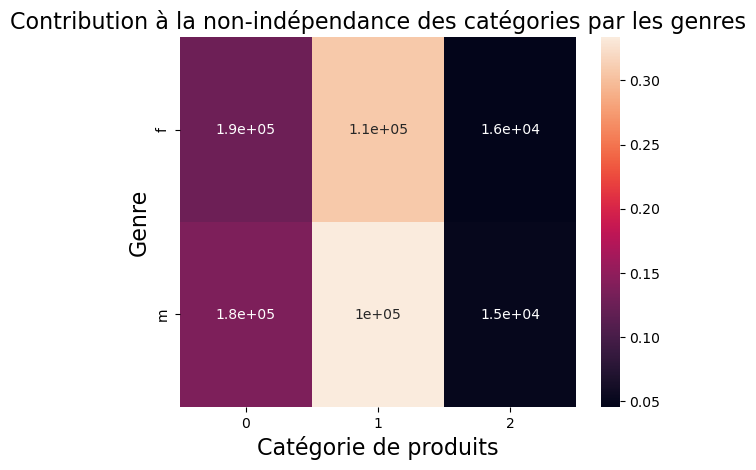

In [266]:
# Affichage du tableau de contingence en heatmap.
tx = tableau_cont.loc[:,["Total"]]
ty = tableau_cont.loc[["Total"],:]
n = len(transac_prod_cust_part)
indep = tx.dot(ty) / n
c = tableau_cont.fillna(0) # On remplace les valeurs nulles par 0

measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.xlabel('Catégorie de produits', fontsize = 16)
plt.ylabel('Genre', fontsize = 16)
plt.title('Contribution à la non-indépendance des catégories par les genres', fontsize = 16)
plt.show()

Les valeurs les plus fortes sont observées dans la catégorie 0.\
La variable genre par rapport à catégorie des livres achetés est la plus forte pour la catégorie 0.\
Toutefois dans toutes les catégories nous remarquons que les femmes achètent plus que les hommes.

In [267]:
xi_n = measure.sum().sum()
xi_n 

18.75788251563821

Nous savons que plus ξn(xi_n)est grand, moins l'hypothèse d'indépendance est valide.

La valeur du xi_n=18.75788251563821 qui semble plutot grand, nous permet d'invalidé l'hypothèse d'indépendance et nous amène à conclure à une dépendance entre le genre et la catégories des produits achetés.

Toutefois, nous allons effectuer le test ce chi2 pour confirmer ou infirmer cette information.

In [268]:
# Effectuons le test du Chi carré(test d'indépendance)
chi2, p, dof, expected = chi2_contingency(tableau_cont)

print(f"Chi-square Statistic : {chi2}")
print(f"P-value : {p}")

Chi-square Statistic : 18.757882515638208
P-value : 0.004592685293327873


La valeur p est très proche de zéro, ce qui indique une forte significativité statistique. \
En utilisant notre seuil de signification (alpha= 0,05), on peut conclure que la p-value obtenue est bien inférieure au seuil de signification. Par conséquent, on peut rejeter l'hypothèse nulle(H0 = absence de corrélation) et considérer la présence d'une relation statistiquement significative(H1) entre nos deux variables.    
 
De plus le **Xi_n étant supérieur à notre valeur critique**, nous rejetons H0, et concluons qu'il existe bien une **dépendance entre le genre des clients et la catégorie des produits achetés**. \
Cette relation est la **plus forte au sein la catégorie 0**, comme le montre la heatmap.

## <font color='purple'>Relation entre l'âge & la catégorie des produits achetés <a class="anchor" id="section_3_2"></a>

Nous avons une variable quantitative(âge) et une variable qualitative(catégorie des produits achetés),nous ferons une visualisations avec des boites à moustaches et comme test statistique, une comparaison de deux variables sur un même échantillon.

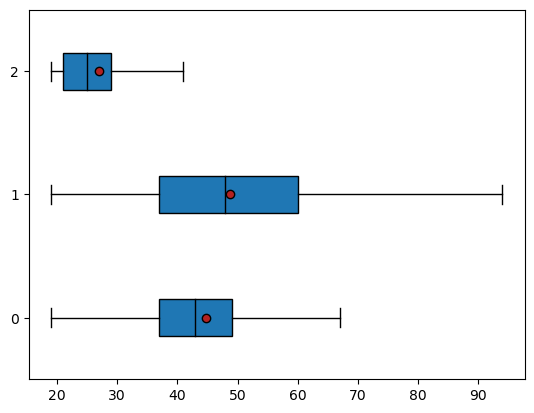

In [269]:
#Visualisation graphique de la relation entre l'âge et la catégorie des produits achetés
X = "categ" # qualitative
Y = "age" # quantitative
sous_echantillon = transac_prod_cust_part.copy() # on utilise comme sous-échantillon, les données complètes
#Affichage du graphique
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


Il est remarquable que seuls les individus âgés de moins de 45 ans achètent des produits de la catégorie 2, tandis que ceux âgés de moins de 70 ans sont les principaux acheteurs des produits de la catégorie 0. En revanche, les produits de la catégorie 1 semblent intéresser une large tranche d'âge, attirant des clients de tous les âges.

Toutefois, la categorie 0 est plus achetés par les clients de 35-50 ans  , la catégorie 1 par les 35-60 ans et la catégorie 2 par les 20-30 ans.


In [270]:
#Hypothèses:
#H0: La variable dont provient l'échantillon ne suit pas une loi Normale
#H1: La variable dont provient l'échantillon suit une loi Normale.

# Test de normalité pour chaque catégorie de livres
categories = transac_prod_cust_part['categ'].unique()

for category in categories:
    # Extraire les âges pour la catégorie donnée
    ages = transac_prod_cust_part[transac_prod_cust_part['categ'] == category]['age']
    
    # Test de normalité (partest de Shapiro-Wilk)
    statistic, p_value =stats.shapiro(ages)
    
    # Afficher les résultats
    print(f"Catégorie {category}:")
    print("Statistique de test :", statistic)
    print("Valeur p :", p_value)
    print()

Catégorie 0:
Statistique de test : 0.9344887733459473
Valeur p : 0.0

Catégorie 1:
Statistique de test : 0.9886741042137146
Valeur p : 0.0

Catégorie 2:
Statistique de test : 0.6736736297607422
Valeur p : 0.0



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Interpretation du test: 

Etant donné que le p-value<0.05, on rejete l'hypothèse nulle H0, et retenir l'hypothèse alternative H1.\
Ainsi nous pouvons dire que la variable âge suit une distribution normale dans chaque catégorie, nous allons alors faire une ANOVA.



In [271]:
# Calcul du rapport de corrélation η2 (eta carré ou eta squared, en anglais)
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = transac_prod_cust_part[transac_prod_cust_part["age"] >= 19]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_squared(sous_echantillon[X],sous_echantillon[Y])
print("η2 :",eta_squared(sous_echantillon[X],sous_echantillon[Y]))

η2 : 0.11313227712747578


Etant donné que **η2=0.12, cela signifie qu'il existe une faible relation entre les variables âge et catégorie de produits achetés.**\
Nous allons effectuer un **test de Student et de Fisher** pour confirmer une infirmer cette information à l'aide de la valeur de la p-value.

In [272]:
#Test de Fisher
st.f_oneway(transac_prod_cust_part['age'], transac_prod_cust_part['categ'])

F_onewayResult(statistic=6365612.488623648, pvalue=0.0)

In [273]:
#Changement du type de categ afin d'effectuer le test de Student 
# La fonction ttest_ind nécessite des variables numériques pour effectuer le test t.
transac_prod_cust_part['categ'] = transac_prod_cust_part['categ'].astype(float)

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_23516\1034133315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transac_prod_cust_part['categ'] = transac_prod_cust_part['categ'].astype(float)


In [274]:
#Test de Student
st.ttest_ind(transac_prod_cust_part['age'], transac_prod_cust_part['categ'])

Ttest_indResult(statistic=2523.016545451816, pvalue=0.0)

*Les tests de Fisher et de Student nous donnent des p-valeurs inférieurs à notre seuil alpha**, il semble donc qu'il existe une corrélation entre l'âge des clients et la catégorie des produits achetés, mais cette corrélation est très faible au vu de l'eta_squared proche de 0**  (0.12)*.

## <font color='purple'>Relation entre l'âge & le montant des achats <a class="anchor" id="section_3_3"></a>

Nous avons deux variables quantitatives.
Nous réaliserons un nuage de points comme visualisation et un test d'association entre deux variables quantitatives comme test statistique.

In [275]:
#Création d'un dataframe avec le montant total des achats par âge
age_montant_part = transac_prod_cust_part.groupby('age')['price'].sum().reset_index()
age_montant_part

,age,price
0,19,591414.230000
1,20,172831.750000
2,21,178802.373140
3,22,174347.660000
4,23,160578.665427
...,...,...
71,90,5090.707713
72,91,4803.640000
73,92,2691.190000
74,93,3959.240000


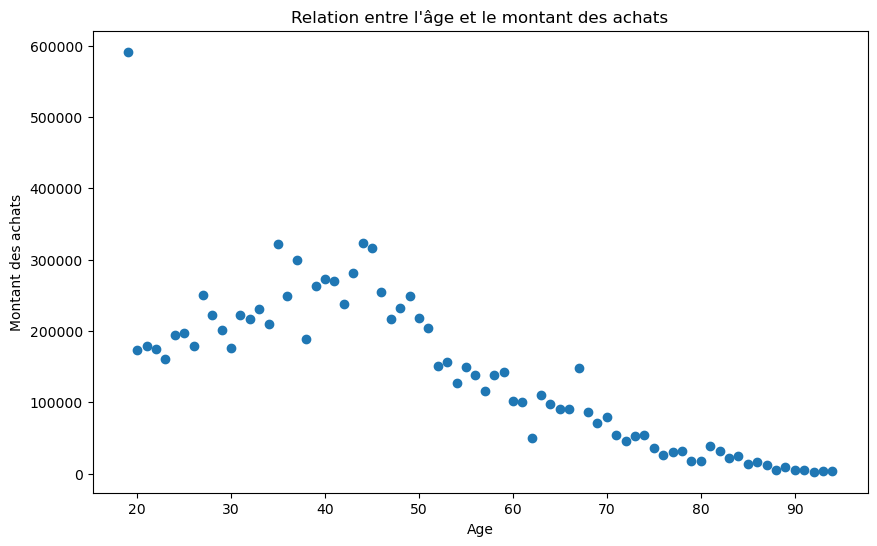

In [276]:
#Graphique de dispersion pour visauliser la relation entre l'âge et le montant des achats
plt.figure(figsize=(10,6))
plt.scatter(age_montant_part['age'], age_montant_part['price'])
plt.xlabel('Age')
plt.ylabel('Montant des achats')
plt.title('Relation entre l\'âge et le montant des achats')
plt.show()

Nous constatons une corrélation entre l'âge des clients et le montant de leurs achats, avec une augmentation progressive du montant des achats à mesure que l'âge augmente pour les clients âgés de 19 à 45 ans environ. Cependant, au-delà de cette tranche d'âge, nous observons une diminution du montant des achats à mesure que l'âge continue d'augmenter.

In [277]:
#Calcul du coefficient de Pearson et de la covariance
age = age_montant_part["age"]
price = age_montant_part["price"]

print("Coefficient de Paerson:\n",st.pearsonr(age, price)[0])
print("Covariance:\n",np.cov(age, price, ddof=0)[1, 0])

Coefficient de Paerson:
 -0.8310031794792778
Covariance:
 -1979349.2119424562


In [278]:
#Calcul du coefficient de corrélation de Pearson(r)
pearsonr(age_montant_part['price'], age_montant_part['age'])

PearsonRResult(statistic=-0.8310031794792778, pvalue=1.5657838598965805e-20)

Le coefficient de corrélation de Pearson est de -0.8310031794792778. Cela indique une corrélation négative modérée à forte entre l'age et le montant des achats. Une valeur proche de -1 suggère une relation linéaire inverse entre les variables, ce qui signifie  le montant des achat et l'age ont tendance à évoluer de manière opposée.En d'autre terme,lorsque l'age augmente, le montant des achats diminue de manière prévisible.

De plus **p-value<0.05, nous allons alors rejeter notre hypothèse H0 et conclure que les variables age et montant des achats sont corrélés mais négativement au vue de notre coefficient de Pearson.**

## <font color='purple'>Relation entre l'âge & la fréquence d'achat <a class="anchor" id="section_3_4"></a>

Nous avons deux variables quantitatives. 
Nous réaliserons un nuage de points comme visualisation et un test d'association entre deux variables quantitatives comme test statistique.

* **Calcul du nombre de jours entre le début et la fin des données relevées.**

In [279]:
from datetime import date

d0 = date(2021, 3, 1)
d1 = date(2023, 2, 9)
nbre = d1 - d0
nbre.days

710

In [280]:
#Nombre de session effectuer par chaque client
df_freq =transac_prod_cust_part.groupby(['client_id', 'age'],as_index=False)[['session_id']].count()
df_freq

,client_id,age,session_id
0,c_1,68,38
1,c_10,67,58
2,c_100,31,8
3,c_1000,57,122
4,c_1001,41,96
...,...,...,...
8589,c_995,68,14
8590,c_996,53,94
8591,c_997,29,58
8592,c_998,22,53


In [281]:
#Création de la variable fréq(fréquence d'achat sur la période étudiée)
df_freq['freq'] = 710 / df_freq['session_id']
df_freq

,client_id,age,session_id,freq
0,c_1,68,38,18.684211
1,c_10,67,58,12.241379
2,c_100,31,8,88.750000
3,c_1000,57,122,5.819672
4,c_1001,41,96,7.395833
...,...,...,...,...
8589,c_995,68,14,50.714286
8590,c_996,53,94,7.553191
8591,c_997,29,58,12.241379
8592,c_998,22,53,13.396226


In [282]:
#Fréquence moyenne d'achat par âge
df_freq =df_freq.groupby('age',as_index=False)['freq'].mean()
df_freq

,age,freq
0,19,41.990846
1,20,51.248837
2,21,44.318513
3,22,39.347960
4,23,43.821797
...,...,...
71,90,117.866168
72,91,20.473787
73,92,21.471920
74,93,78.541210


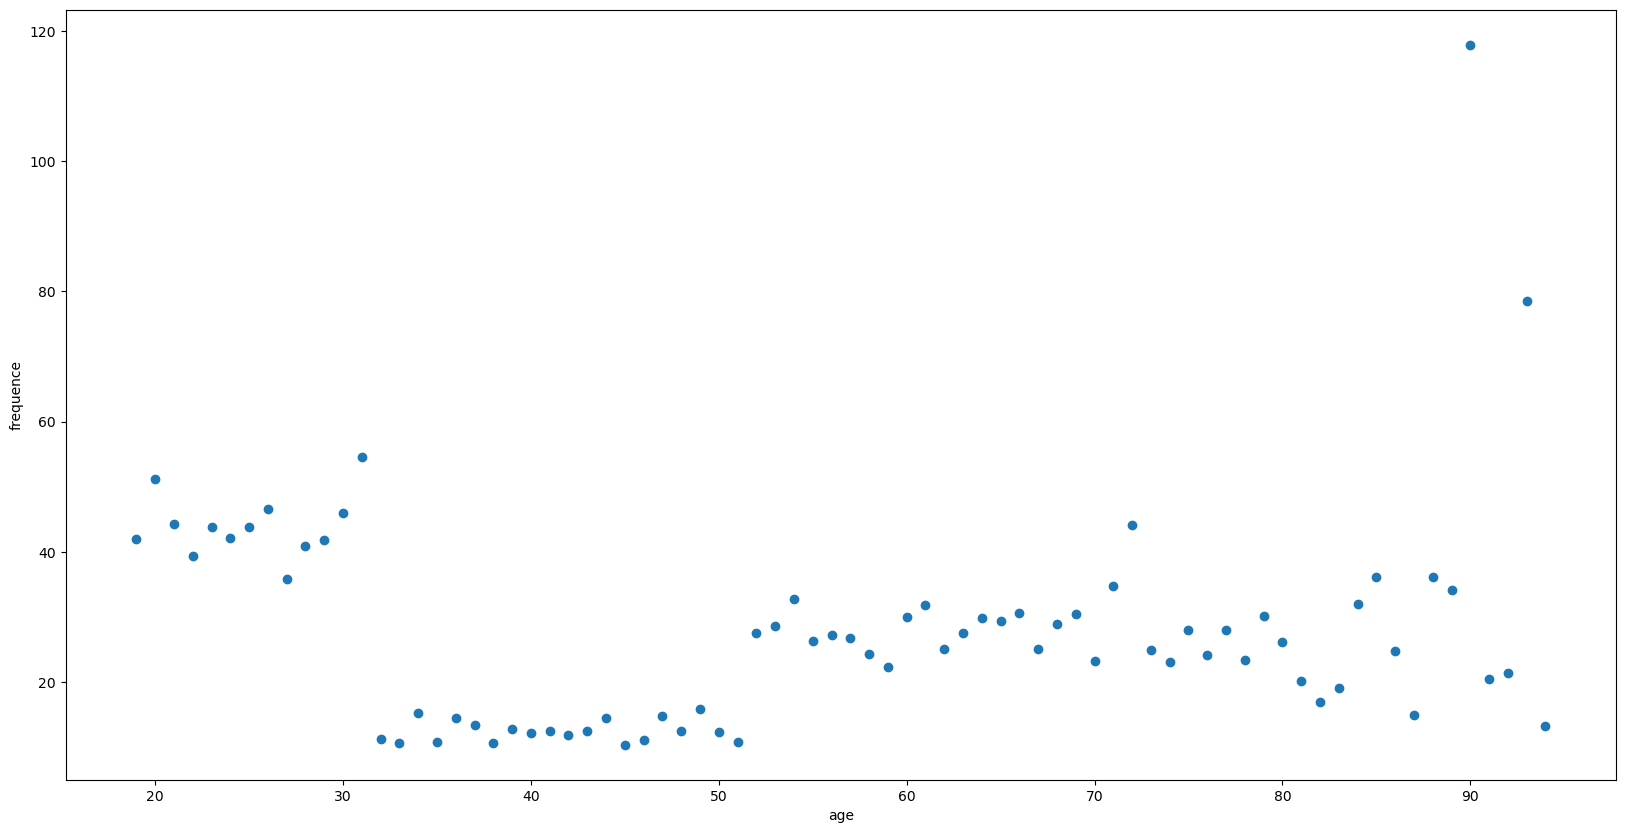

In [283]:
# Graphique de dispersion pour visualiser la relation entre l'âge et la fréquence d'achat
plt.figure(figsize = (20, 10))
plt.plot(df_freq['age'], df_freq['freq'], "o")
plt.xlabel("age")
plt.ylabel("frequence")
plt.show()

A première vue, il ne semble pas y avoir de relation en l'âge et le fréquence d'achat. 


In [284]:
#Régression linéaire
Y =df_freq['freq']
X = df_freq[['age']]
X = X.copy()  
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()  
a,b = result.params['age'],result.params['intercept']

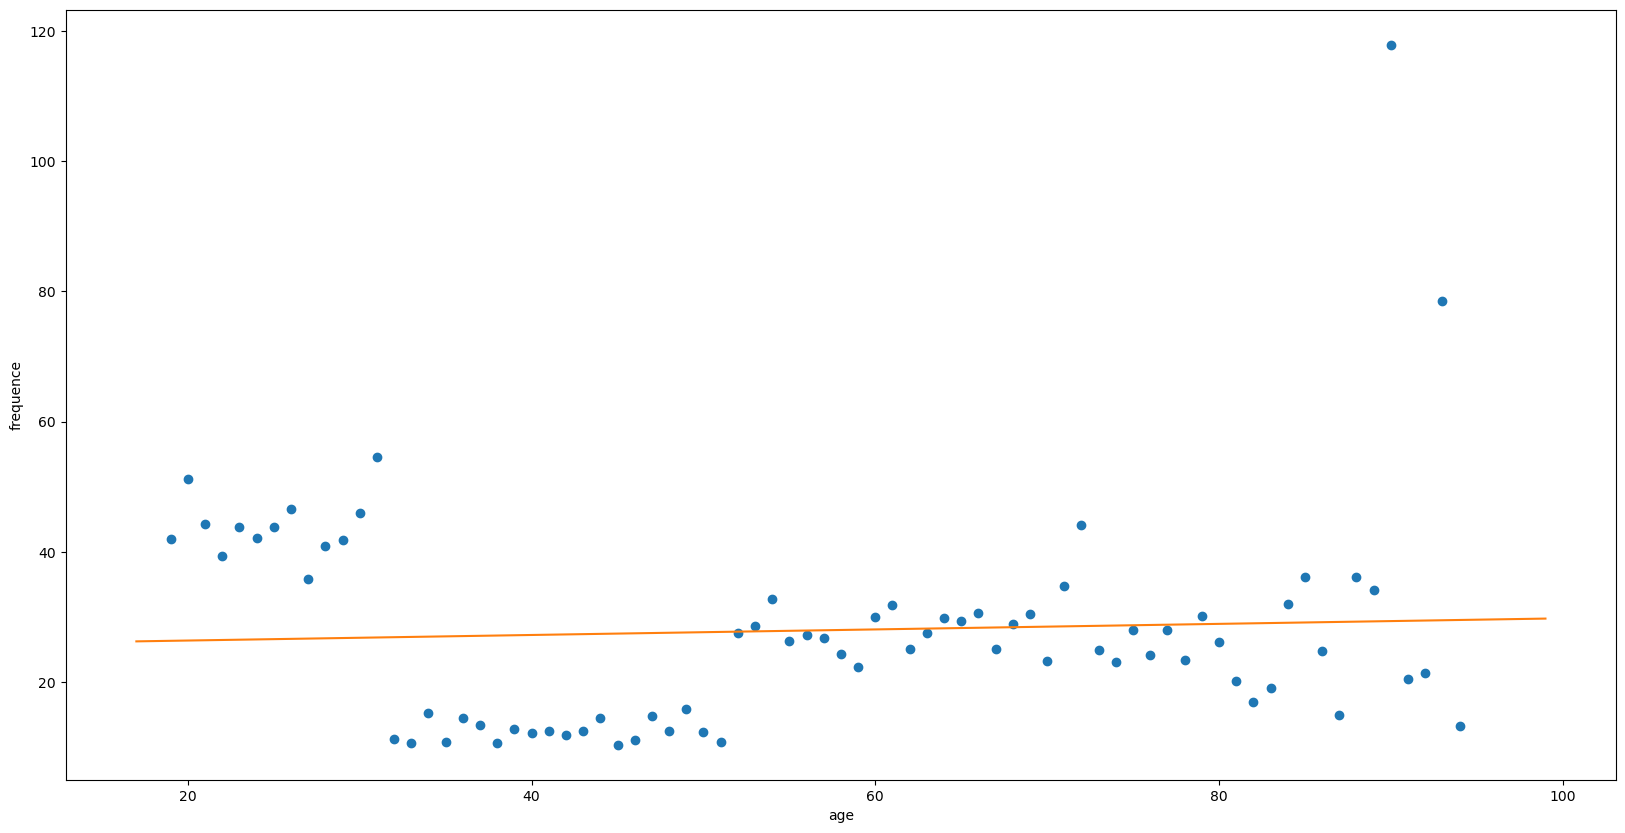

In [285]:
plt.figure(figsize = (20, 10))
plt.plot(df_freq['age'], df_freq['freq'], "o")
plt.plot(np.arange(17,100),[a*x+b for x in np.arange(17,100)])
plt.xlabel("age")
plt.ylabel("frequence")
plt.show()

In [286]:
#Calcul du coefficient de corrélation de Pearson(r) 
pearsonr(df_freq['freq'], df_freq['age'])

PearsonRResult(statistic=0.056860176789379976, pvalue=0.6256381969273401)

Le p-value>0.05, signifie que nous ne pouvons pas rejeter l'hypothèse H0 (absence de relation) et considérer l'hypothèse H1(relation entre les deux variables).\
Les données observées ne sont pas significatives **pvalue > 0.05, l'âge et la fréquence d'achat ne sont donc pas corrélées.**

## <font color='purple'>Relation entre l'âge & la taille du panier moyen <a class="anchor" id="section_3_5"></a>

Nos deux variables sont quantitatives.Nous effectuerons un nuage de points comme visualisation et un test d'association entre deux variables quantitatives comme test statistique.

In [287]:
panier_moyen=transac_prod_cust_part.groupby(['age'])['price'].mean()
panier_moyen=panier_moyen.reset_index()
panier_moyen.rename(columns={'price': 'panier_moy'}, inplace=True)
panier_moyen

,age,panier_moy
0,19,40.044298
1,20,40.781442
2,21,40.018436
3,22,41.900423
4,23,37.352562
...,...,...
71,90,16.160977
72,91,16.394676
73,92,16.409695
74,93,17.834414


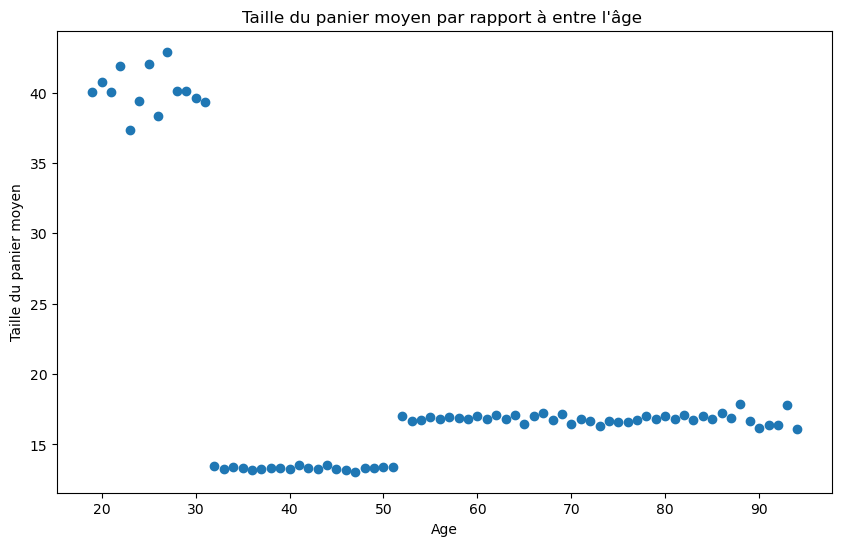

In [288]:
#Graphique de dispersion pour visualiser la relation entre l'âge et la taille du panier moyen
plt.figure(figsize=(10,6))
plt.scatter(panier_moyen['age'],panier_moyen['panier_moy'])
plt.xlabel('Age')
plt.ylabel('Taille du panier moyen')
plt.title('Taille du panier moyen par rapport à entre l\'âge ')
plt.show()

In [289]:
age=panier_moyen['age']
panier_moy=panier_moyen['panier_moy']

# Calcul du coefficient de corrélation de Pearson et p-value
correlation, p_value = stats.pearsonr(age, panier_moy)

# Affichage des résultats
print("Coefficient de corrélation de pearson :", correlation)
print("p-value :", p_value)

Coefficient de corrélation de pearson : -0.5464048280357454
p-value : 3.2922386740061496e-07


Le coefficient de corrélation est négatif, ce qui suggère une corrélation négative modérée entre l'âge et la taille du panier moyen.
Cela signifie que lorsque l'âge augmente, la taille du panier moyen tend à diminuer, et vice versa. \
Notre seuil alpha étant égal à 0.05, **p-value<0.05, nous ne pouvons pas rejeter notre hypothèse H0(absence de relation) ainsi nous pouvons considérer qu'il y a une relation entre l'âge et la taille du panier moyen.**